                                    ***Sakib Mizan_A_2154901009 ML Final Project***

### Importing Libraries

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing Dataset

In [170]:
dataset = pd.read_csv('14-StudentsPerformance.csv')
dataset.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [171]:
dataset.shape

(1000, 8)

### Check Dataset for Missing Values

In [172]:
missing_data = dataset.isnull().sum()
print(missing_data)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


### Checking for Duplicate Data

In [173]:
duplicate_data = dataset.duplicated().sum()
print(duplicate_data)

0


### Checking Data Type

In [174]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking for Unique Entities

In [175]:
dataset.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Statistical Overview of the Dataset

In [176]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Assigning Independent variables to x & Dependent variables to y

In [177]:
x = dataset.drop("test preparation course", axis=1)

x.head()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,72,72,74
1,female,group C,some college,standard,69,90,88
2,female,group B,master's degree,standard,90,95,93
3,male,group A,associate's degree,free/reduced,47,57,44
4,male,group C,some college,standard,76,78,75


In [178]:
y = dataset["test preparation course"]

y.head()

0         none
1    completed
2         none
3         none
4         none
Name: test preparation course, dtype: object

### Checking Target Class Imbalance

Class distribution:
test preparation course
none         642
completed    358
Name: count, dtype: int64


Class Percentages:
test preparation course
none         64.2
completed    35.8
Name: proportion, dtype: float64


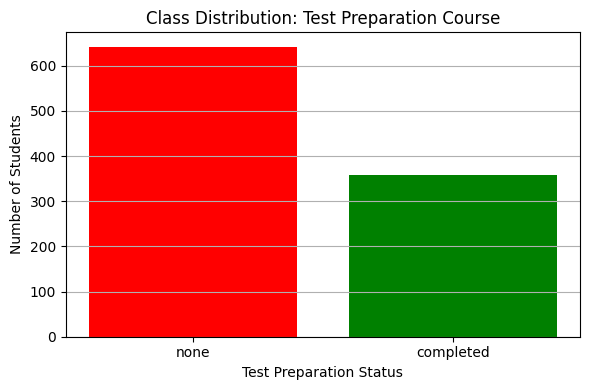

In [179]:
target_counts = dataset['test preparation course'].value_counts()
print("Class distribution:")
print(target_counts)

print("\n\nClass Percentages:")
print(dataset["test preparation course"].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
plt.bar(target_counts.index, target_counts.values, color=['#FF0000', '#008000'])

plt.title("Class Distribution: Test Preparation Course")
plt.xlabel("Test Preparation Status")
plt.ylabel("Number of Students")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### Encoding Independent variables

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1, 2, 3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

print(pd.DataFrame(x))
#print(x)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

### Encoding Dependent variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(pd.DataFrame(y))
#print(y)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

### Splitting Data into Training & Testing set

((800, 18), (200, 18), (800,), (200,))